In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import pywt
from scipy.stats import median_absolute_deviation
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy import stats


# csv_file = '../ro_uart_logs/ro_log_raw.csv'

# # Read the CSV file into a Pandas DataFrame
# df = pd.read_csv(csv_file)

In [30]:
def extract_features(window, only_stat=False):
    features = {}
    
    features['mean'] = window.mean()
    features['std'] = window.std()
    features['median'] = np.median(window)
    
    if only_stat == True:
        return pd.Series(features)
        
    
    # Discrete Wavelet Transform (DWT) using pywt library
    coeffs = pywt.dwt(window, 'db4')
    features['cA'] = np.mean(coeffs[0])  # Approximation coefficients
    features['cD'] = np.mean(coeffs[1])  # Detail coefficients
    
    return pd.Series(features)

In [28]:
csv_file = '/home/srchand/Desktop/research/TVM_Intel_Fork/tvm/vta/sri_scripts/dataset/ro_uart/rcg/network_21.csv'

def extract_windows_and_labels(file_path, window_size, overlap):
    data = pd.read_csv(file_path)
    windows = []
    labels = []

    for i in range(0, len(data) - window_size + 1, overlap):
        window = data.iloc[i:i + window_size]
        if 'boundary' in window['LAYER_OR_BOUNDARY'].values:
            label = 'boundary'
        else:
            label = 'layer'
        windows.append(window['RO_VALUE'])
        labels.append(label)

    return windows, labels

# Directory containing CSV files (replace with your directory path)
data_dir = 'your_data_directory'
window_size = 20  # Adjust window size as needed
overlap = 1       # Adjust overlap as needed

X = []  # List to store windows
y = []  # List to store labels

# Loop through each CSV file in the directory
# for filename in os.listdir(data_dir):
#     if filename.endswith(".csv"):
#         file_path = os.path.join(data_dir, filename)
windows, labels = extract_windows_and_labels(csv_file, window_size, overlap)
X.extend(windows)
y.extend(labels)

In [31]:
df_features = pd.DataFrame(extract_features(window) for window in X)

In [33]:
medians = df_features['median']

normalized_features = (df_features - df_features.mean()) / df_features.std()

normalized_features['median'] = medians


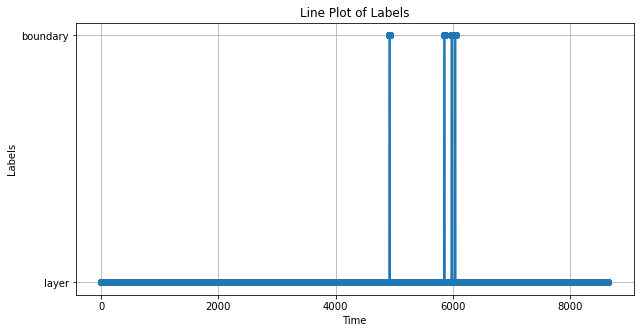

In [25]:
time_axis = range(len(y))

plt.figure(figsize=(10,5))
plt.plot(time_axis,y,marker='o',linestyle='-')
plt.xlabel('Time')
plt.ylabel('Labels')
plt.title('Line Plot of Labels')
plt.grid(True)

plt.yticks(['layer','boundary'])
plt.show()

In [21]:
df.plot(subplots=True, figsize=(20,10))
plt.ylim(18000,22000)
plt.show()


NameError: name 'df' is not defined

In [26]:
def find_first_occ(arr, check_element='boundary'):
    for i, val in enumerate(arr):
            if val == check_element:
                return i
    return -1

def count_contig(arr, check_element='boundary'):
    regions = 0
    curr_value = arr[0]
    first_occ = 0
    if curr_value != check_element:
        first_occ = find_first_occ(arr,check_element)
        
    curr_value = arr[first_occ]
    in_region = False
    for i in range(first_occ,len(arr)):
        if arr[i] == check_element:
            if not in_region:
                regions += 1
                in_region = True
        else:
            in_region = False
    
    return regions

In [27]:
count_contig(y)

4